#**1 Author**

**Student Name**: Sahib Bhatti
**Student ID**: 190319889

# **2 Problem formulation**

Using the full MLEND Yummy Dataset consisting of 3250 samples of dishes, I will predict the diet of the dishes, whether they are non_vegeratiran, vegetatian or vegan. This is a multi-class classification problem.

#**3 Machine Learning pipeline**

I will begin by preprocessing the data through removing unnecessary columns and rows of the dataset. I will remove null values also. By doing this I won't receive unexpected behaviour from the models that cannot handle them, leading to improved model performance and a lower margin of error.

The next stage will be to transform the categorical data to numerical using one-hot encoding. I will then fit and transform the desired columns with label encoding and drop the column that I am predicting.

I will then split the training and testing datasets.

The next stage will be to run different models and see which gives the most accurate prediction.

# **4 Transformation stage**


# One-hot encoding

I have used one-hot encoding as my transformation stage. Since I am predicting the diet of the dish, I will need to turn my categorical features of the dataset into categorical so that they can be processed by the models later.

In [94]:
# Convert categorical variables to numerical using one-hot encoding
MLENDYD_df = pd.get_dummies(MLENDYD_df, columns=['Cuisine', 'Home_or_restaurant'], drop_first=True)

In [95]:
MLENDYD_df.head()

,Diet,Dish_name,Ingredients,Healthiness_rating_int,Likeness_int,Benchmark_A,Cuisine_african,Cuisine_american,Cuisine_american_italian,Cuisine_american_mexican,...,Home_or_restaurant_wetherspoons,Home_or_restaurant_wicked_burgers,Home_or_restaurant_wngz,Home_or_restaurant_wok&box,Home_or_restaurant_wok_&_box,Home_or_restaurant_ymca_indian_restaurant,Home_or_restaurant_you_me_sushi,Home_or_restaurant_young_cheng_buffet,Home_or_restaurant_yumpees,Home_or_restaurant_yun_gui_chuan
filename,,,,,,,,,,,,,,,,,,,,,
000001.jpg,non_vegetarian,chicken_katsu_rice,"rice,chicken_breast,spicy_curry_sauce",3.0,4.0,Train,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000002.jpg,non_vegetarian,english_breakfast,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",2.0,4.0,Train,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000003.jpg,non_vegetarian,spicy_chicken,"chili,chicken,peanuts,sihuan_peppercorns,green...",3.0,5.0,Train,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000004.jpg,vegetarian,gulab_jamun,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",2.0,5.0,Train,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000005.jpg,non_vegetarian,chicken_masala,"chicken,lemon,turmeric,garam_masala,coriander_...",4.0,5.0,Train,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now you can see that the once categorical data is now numerical which is useful.

# Label encoding

Here I label encode the columns ingredients and dish name turning them into numerical features, whilst dropping their categorical counterpart.

In [96]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the column with label encoding
MLENDYD_df['Ingredients_encoded'] = label_encoder.fit_transform(MLENDYD_df['Ingredients'])
MLENDYD_df['Dish_name_encoded'] = label_encoder.fit_transform(MLENDYD_df['Dish_name'])

In [97]:
MLENDYD_df = MLENDYD_df.drop(columns=['Dish_name','Ingredients'])

In [98]:
MLENDYD_df.head()

,Diet,Healthiness_rating_int,Likeness_int,Benchmark_A,Cuisine_african,Cuisine_american,Cuisine_american_italian,Cuisine_american_mexican,Cuisine_arab,Cuisine_arab_spanish,...,Home_or_restaurant_wngz,Home_or_restaurant_wok&box,Home_or_restaurant_wok_&_box,Home_or_restaurant_ymca_indian_restaurant,Home_or_restaurant_you_me_sushi,Home_or_restaurant_young_cheng_buffet,Home_or_restaurant_yumpees,Home_or_restaurant_yun_gui_chuan,Ingredients_encoded,Dish_name_encoded
filename,,,,,,,,,,,,,,,,,,,,,
000001.jpg,non_vegetarian,3.0,4.0,Train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2401,495
000002.jpg,non_vegetarian,2.0,4.0,Train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1188,881
000003.jpg,non_vegetarian,3.0,5.0,Train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,918,2231
000004.jpg,vegetarian,2.0,5.0,Train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2839,1073
000005.jpg,non_vegetarian,4.0,5.0,Train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,625,514


In [99]:
MLENDYD_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3250 entries, 000001.jpg to 003250.jpg
Columns: 347 entries, Diet to Dish_name_encoded
dtypes: float64(2), int64(2), object(2), uint8(341)
memory usage: 1.2+ MB


#**5 Modelling**

I have chosen the models Random Forest, k-Nearest Neighbours and Support Vector Machine model because it can perform well against many different types of datasets and can handle complex relationships.

I have chosen k-Nearest Neighbours to see how it captures local patterns.

I have chosen Support Vector Machine model since it can be useful in high dimensionality spaces.

In [111]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Create a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42, max_depth=33, n_estimators=50)
random_forest_model.fit(train_features, train_labels)
#RFC train
rf_predictions_train = random_forest_model.predict(train_features)
rf_accuracy_train = accuracy_score(train_labels, rf_predictions_train)
#RFC test
rf_predictions_test = random_forest_model.predict(test_features)
rf_accuracy_test = accuracy_score(test_labels, rf_predictions_test)

# Create a k-Nearest Neighbours model
knn_model = KNeighborsClassifier()
knn_model.fit(train_features, train_labels)
knn_predictions = knn_model.predict(test_features)
knn_accuracy = accuracy_score(test_labels, knn_predictions)

# Create a Support Vector Machine model
svm_model = SVC(random_state=42)
svm_model.fit(train_features, train_labels)
svm_predictions = svm_model.predict(test_features)
svm_accuracy = accuracy_score(test_labels, svm_predictions)

#**6 Methodology**
This section contains my training model, accuracies and my confusion matrix.

#Splitting the Train and Test Data

I split my train data and test data according to 'Benchmark_A' which determined which of my samples were train or test samples. I then dropped the 'Benchmark_A' column in both new datasets.

In [105]:
train_data = MLENDYD_df[MLENDYD_df['Benchmark_A'] == 'Train']
test_data = MLENDYD_df[MLENDYD_df['Benchmark_A'] == 'Test']
train_data = train_data.drop(columns=['Benchmark_A'])
test_data = test_data.drop(columns=['Benchmark_A'])

In [106]:
train_data.head()

,Diet,Healthiness_rating_int,Likeness_int,Cuisine_african,Cuisine_american,Cuisine_american_italian,Cuisine_american_mexican,Cuisine_arab,Cuisine_arab_spanish,Cuisine_argentina,...,Home_or_restaurant_wngz,Home_or_restaurant_wok&box,Home_or_restaurant_wok_&_box,Home_or_restaurant_ymca_indian_restaurant,Home_or_restaurant_you_me_sushi,Home_or_restaurant_young_cheng_buffet,Home_or_restaurant_yumpees,Home_or_restaurant_yun_gui_chuan,Ingredients_encoded,Dish_name_encoded
filename,,,,,,,,,,,,,,,,,,,,,
000001.jpg,non_vegetarian,3.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2401,495
000002.jpg,non_vegetarian,2.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1188,881
000003.jpg,non_vegetarian,3.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,918,2231
000004.jpg,vegetarian,2.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2839,1073
000005.jpg,non_vegetarian,4.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,625,514


In [107]:
#Printing shapes for train and test datasets, train is bigger
print("Train shape", train_data.shape)
print("Test shape", test_data.shape)

Train shape (2272, 346)
Test shape (974, 346)


I separated the datasets into their features and labels for both testing and training. The features are the input variables whilst the output is the label we are trying to predict which is 'Diet'.

In [108]:
train_features = train_data.drop(columns=['Diet']) # dropping the label as this is what we are predicting, so it cannot be an input
train_labels = train_data['Diet'] # Extracting the target variable

test_features = test_data.drop(columns=['Diet']) # dropping the label as this is what we are predicting, so it cannot be an input
test_labels = test_data['Diet'] # Extracting the target variable

In [109]:
print("Train data organised by diet")
train_labels.value_counts()

Train data organised by diet


non_vegetarian    1124
vegetarian         932
vegan              216
Name: Diet, dtype: int64

In [110]:
print("Test data organised by diet")
test_labels.value_counts()

Test data organised by diet


non_vegetarian    483
vegetarian        397
vegan              94
Name: Diet, dtype: int64

#Accuracies

After experimenting, we can see that Random Forest gave the greatest accuracy. This can be due to its algorithm of building and merging multiple decision trees improving the accuracy. However, it is slightly overfitting as it is working better on the training dataset than the testing.

In [116]:
# Display accuracies for all models
print(f"Random Forest Train Accuracy: {rf_accuracy_train:.4f}")
print(f"Random Forest Test Accuracy: {rf_accuracy_test:.4f}")
print(f"\nk-Nearest Neighbors Accuracy: {knn_accuracy:.4f}")
print(f"\nSVM Accuracy: {svm_accuracy:.4f}")

Random Forest Train Accuracy: 0.9846
Random Forest Test Accuracy: 0.7228

k-Nearest Neighbors Accuracy: 0.5986

SVM Accuracy: 0.5329


**Random Forest Model Confusion Matrix**

Since Random Forest has the highest accuracy, let's visualise the confusion matrix for training and testing to interpret the per class accuracies


Confusion Matrix for Random Forest Model Training:


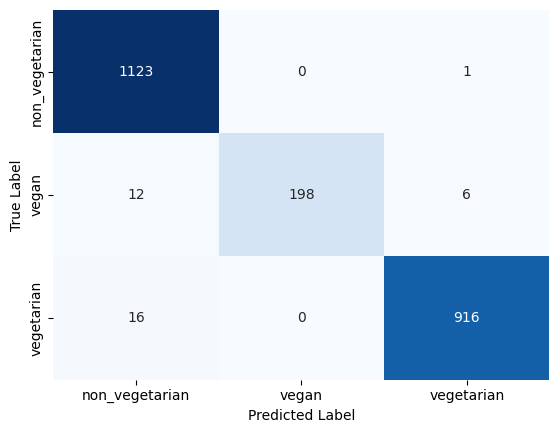


Confusion Matrix for Random Forest Model Testing:


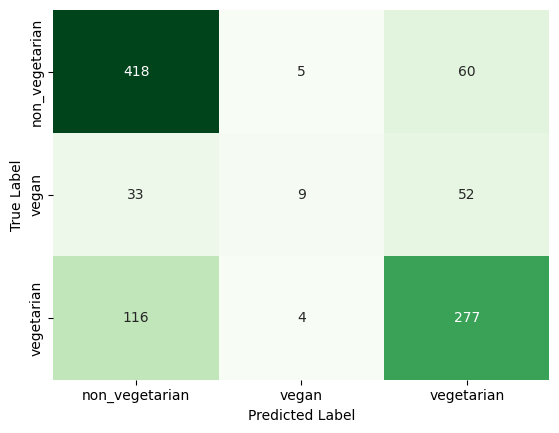

In [112]:
#Train
print("\nConfusion Matrix for Random Forest Model Training:")
conf_matrix_rf = confusion_matrix(train_labels, rf_predictions_train)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=random_forest_model.classes_, yticklabels=random_forest_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Test
print("\nConfusion Matrix for Random Forest Model Testing:")
conf_matrix_rf = confusion_matrix(test_labels, rf_predictions_test)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=random_forest_model.classes_, yticklabels=random_forest_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

We can see that in both the training and testing dataset, the highest values fall in the correctly classified classes which means most times the predictions are correct for non vegetarian, vegan and vegetarian. The training dataset is almost flawless.

#**7 Dataset**
In this section, I will preprocess the data and create a dataset consisting only of the attributes needed for me to run my models.

In [89]:
pip install mlend --upgrade

In [90]:
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

import spkit as sp
from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd_big/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')
MLENDYD_df

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test
003248.jpg,vegetarian,indian,indian,samosa,home,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,1.0,like,4.0,Test


In [92]:
MLENDYD_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3250 entries, 000001.jpg to 003250.jpg
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Diet                    3250 non-null   object 
 1   Cuisine_org             3245 non-null   object 
 2   Cuisine                 3245 non-null   object 
 3   Dish_name               3250 non-null   object 
 4   Home_or_restaurant      3250 non-null   object 
 5   Ingredients             3250 non-null   object 
 6   Healthiness_rating      3249 non-null   object 
 7   Healthiness_rating_int  3249 non-null   float64
 8   Likeness                3246 non-null   object 
 9   Likeness_int            3246 non-null   float64
 10  Benchmark_A             3250 non-null   object 
dtypes: float64(2), object(9)
memory usage: 304.7+ KB


# Preprocessing before transformation

Dropping duplicate columns and columns which are unnecessary. Cuisine_org is a pure duplicate column. For this project, we don't need 2 columns measuring healthiness and likeness so will remove the categorical ones, and leave the numerical.

In [93]:
MLENDYD_df = MLENDYD_df.drop(columns=['Cuisine_org','Healthiness_rating','Likeness'])

In [74]:
MLENDYD_df.head()

,Diet,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating_int,Likeness_int,Benchmark_A
filename,,,,,,,,
000001.jpg,non_vegetarian,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",3.0,4.0,Train
000002.jpg,non_vegetarian,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",2.0,4.0,Train
000003.jpg,non_vegetarian,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",3.0,5.0,Train
000004.jpg,vegetarian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",2.0,5.0,Train
000005.jpg,non_vegetarian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",4.0,5.0,Train


**Go to part 4 Transformation to see the continuation of the code, then come back to see the preprocessing after transformation**

#Preprocessing post transformation

After turning the data from categorical into numerical from the transformation stage in part 4,I then summed all the null valuesand removed them. This is because if I was to run my models with null values or NaN values still present, then I will receive errors.

In [100]:
MLENDYD_df.isnull().sum()

Diet                                     0
Healthiness_rating_int                   1
Likeness_int                             4
Benchmark_A                              0
Cuisine_african                          0
                                        ..
Home_or_restaurant_young_cheng_buffet    0
Home_or_restaurant_yumpees               0
Home_or_restaurant_yun_gui_chuan         0
Ingredients_encoded                      0
Dish_name_encoded                        0
Length: 347, dtype: int64

In [102]:
#Removing rows with missing values to enable the models to run without receiving errors of NaN values
MLENDYD_df = MLENDYD_df.dropna()
MLENDYD_df

,Diet,Healthiness_rating_int,Likeness_int,Benchmark_A,Cuisine_african,Cuisine_american,Cuisine_american_italian,Cuisine_american_mexican,Cuisine_arab,Cuisine_arab_spanish,...,Home_or_restaurant_wngz,Home_or_restaurant_wok&box,Home_or_restaurant_wok_&_box,Home_or_restaurant_ymca_indian_restaurant,Home_or_restaurant_you_me_sushi,Home_or_restaurant_young_cheng_buffet,Home_or_restaurant_yumpees,Home_or_restaurant_yun_gui_chuan,Ingredients_encoded,Dish_name_encoded
filename,,,,,,,,,,,,,,,,,,,,,
000001.jpg,non_vegetarian,3.0,4.0,Train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2401,495
000002.jpg,non_vegetarian,2.0,4.0,Train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1188,881
000003.jpg,non_vegetarian,3.0,5.0,Train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,918,2231
000004.jpg,vegetarian,2.0,5.0,Train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2839,1073
000005.jpg,non_vegetarian,4.0,5.0,Train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,625,514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,vegetarian,4.0,5.0,Train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2601
003247.jpg,vegetarian,4.0,5.0,Test,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1375,1593
003248.jpg,vegetarian,1.0,4.0,Test,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2211,2060


#**8 Results**


I decided to see if I could further improve the accuracies and per class accuracies so I decided to experiment with a graident boosting model. This is because it seemed a good fit since it starts by building some weak learners in a sequential manner such as a decision tree where each sequence it corrects the errors of the previous.

Gradient Boosting Accuracy Train: 0.9538
Gradient Boosting Accuracy Test: 0.7423

Confusion Matrix for Gradient boosting model for Training:


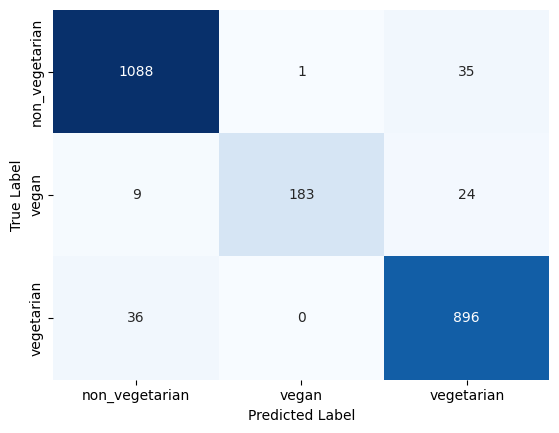


Confusion Matrix for Gradient boosting model for Testing:


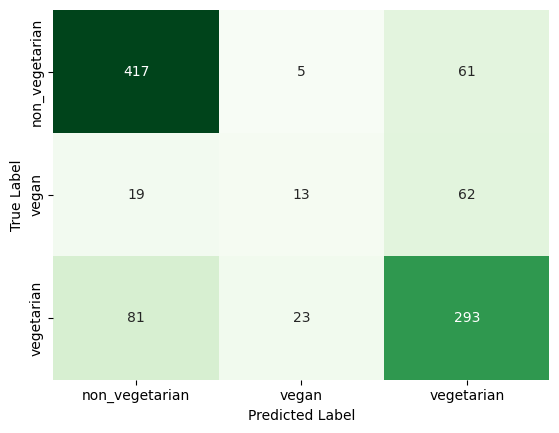

In [113]:
# Create a Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=42, n_estimators=900)
gradient_boosting_model.fit(train_features, train_labels)
#GB train
gb_predictions_train = gradient_boosting_model.predict(train_features)
gb_accuracy_train = accuracy_score(train_labels, gb_predictions_train)
#GB test
gb_predictions_test = gradient_boosting_model.predict(test_features)
gb_accuracy_test = accuracy_score(test_labels, gb_predictions_test)


print(f"Gradient Boosting Accuracy Train: {gb_accuracy_train:.4f}")
print(f"Gradient Boosting Accuracy Test: {gb_accuracy_test:.4f}")

# Display the confusion matrix with a heatmap for the Gradient boosting as an example
print("\nConfusion Matrix for Gradient boosting model for Training:")
conf_matrix_rf = confusion_matrix(train_labels, gb_predictions_train)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=gradient_boosting_model.classes_, yticklabels=gradient_boosting_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("\nConfusion Matrix for Gradient boosting model for Testing:")
conf_matrix_rf = confusion_matrix(test_labels, gb_predictions_test)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=gradient_boosting_model.classes_, yticklabels=gradient_boosting_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


The overall test accuracy is 0.74 of the Gradient Boosting model compared to the 0.72 of the Random Forest which therefore makes it a better fit. The per class accuracies also look equally good or maybe even better.

In [114]:
# Classification report
print("Classification Report:")
print(classification_report(test_labels, gb_predictions_test))

Classification Report:
                precision    recall  f1-score   support

non_vegetarian       0.81      0.86      0.83       483
         vegan       0.32      0.14      0.19        94
    vegetarian       0.70      0.74      0.72       397

      accuracy                           0.74       974
     macro avg       0.61      0.58      0.58       974
  weighted avg       0.72      0.74      0.73       974



From the classification report you can see that the Gradient Boosting model has good precision for non-vegetarian and vegetarian but is not so good for the vegan. The recall being the ratio of true positives to actual positives shows that the model is also good at capturing non-vegetarian and vegetarian. The f1 score showing the balance between precision and recall is also quiite good.

#**9 Conclusions**

To conclude, I was able to classify vegetarian and non vegetarian classes to a good degree using the Random Forest and Gradient Boosting model. The vegan model was not captured as well as the other two. The Gradient Boosting model is the best one since it has the highest test accuracy.

An improvement for next time is to perhaps experiment with more models to attempt to get better accuracy overall which would improve the accuracy of the vegan class.